In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

from scipy.stats import zscore, boxcox

import statsmodels.formula.api as smf

from collections import Counter

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV



from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR

from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


import pickle

import warnings
warnings.filterwarnings('ignore')

In [37]:
#storing the file path/ url path in a variable
df0 = pd.read_csv("C:\\Users\\vikas\\Desktop\\PGDS\\avocado.csv")

In [38]:
#read top 5 rows of the data
df0.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [39]:
#read last 5 rows of the data
df0.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [40]:
#checking shape & datatypes of the columns in data...
print(df0.shape)
print(' ')
print(df0.dtypes)

(18249, 14)
 
Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object


In [41]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [42]:
df0.drop('Unnamed: 0', axis=1, inplace=True)

In [43]:
df0.duplicated().sum()

0

In [44]:
df0['Date']=pd.to_datetime(df0['Date'])
df0['Month']=df0['Date'].apply(lambda x:x.month)
df0['Day']=df0['Date'].apply(lambda x:x.day)
df0.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [45]:
df0.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


In [46]:
#total missing values
df0.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [47]:
# % of missing values
df0.isnull().sum()*100/df0.shape[0]

Date            0.0
AveragePrice    0.0
Total Volume    0.0
4046            0.0
4225            0.0
4770            0.0
Total Bags      0.0
Small Bags      0.0
Large Bags      0.0
XLarge Bags     0.0
type            0.0
year            0.0
region          0.0
Month           0.0
Day             0.0
dtype: float64

In [48]:
#counting total vaues of 0/zero entries in data...
df0[df0 ==0].count()

Date                0
AveragePrice        0
Total Volume        0
4046              242
4225               61
4770             5497
Total Bags         15
Small Bags        159
Large Bags       2370
XLarge Bags     12048
type                0
year                0
region              0
Month               0
Day                 0
dtype: int64

In [49]:
columns = df0.columns.tolist()
columns_renamed = [column.strip().replace(" ", "_").lower() for column in columns]
df0.columns = columns_renamed
df0.columns

Index(['date', 'averageprice', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'region', 'month', 'day'],
      dtype='object')

In [50]:
#Copying dataframe
df1 = df0.copy()

In [51]:
df1.head()

,date,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [52]:
import plotly.offline as py
import plotly.graph_objs as go

In [53]:
Type=df1.groupby('type')['total_volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']

trace=go.Pie(labels=labels,values=values)
py.iplot([trace])

### We can clearly see conventional is about 97% and organic is about 3%.

Text(0.5, 1.0, 'Average Price Per Month')

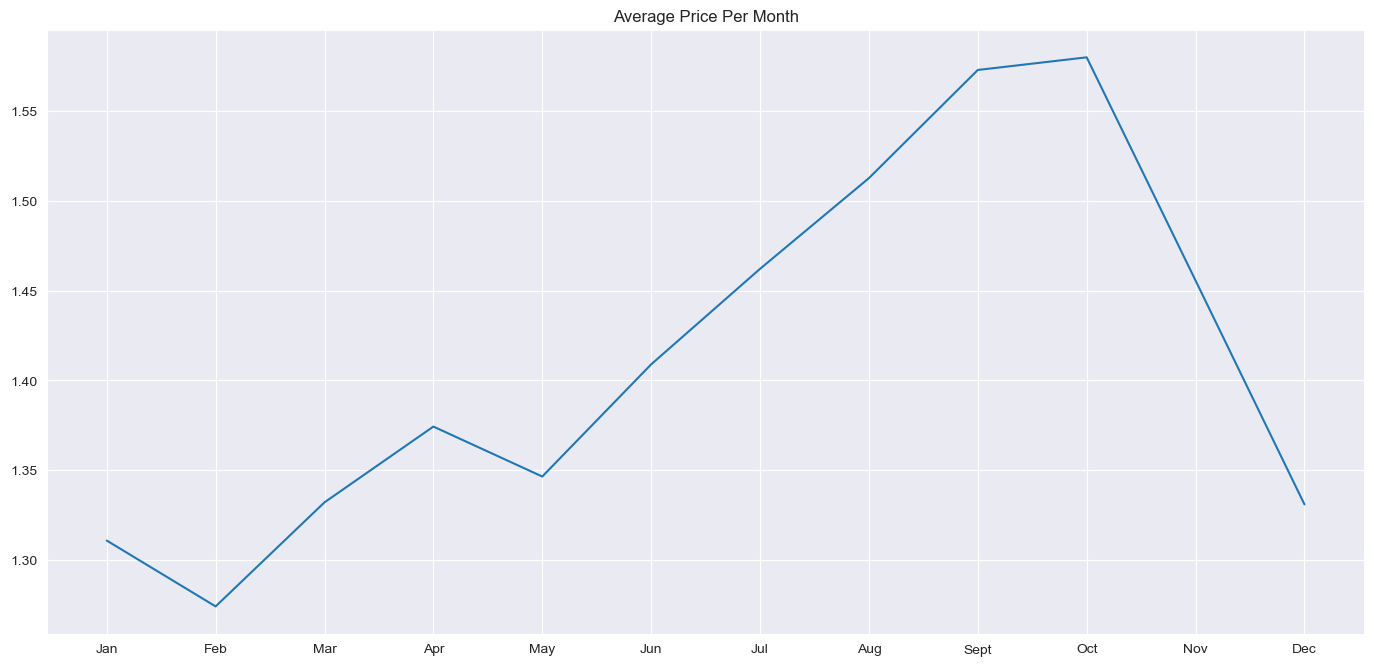

In [54]:
byMonth = df1.groupby("month").mean()
plt.figure(figsize=(17,8),dpi=100)
plt.plot(["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"],byMonth['averageprice'])
plt.title('Average Price Per Month')

#### the average price reaches its highest in the month of oct

Text(0.5, 1.0, 'Average Price Per Day')

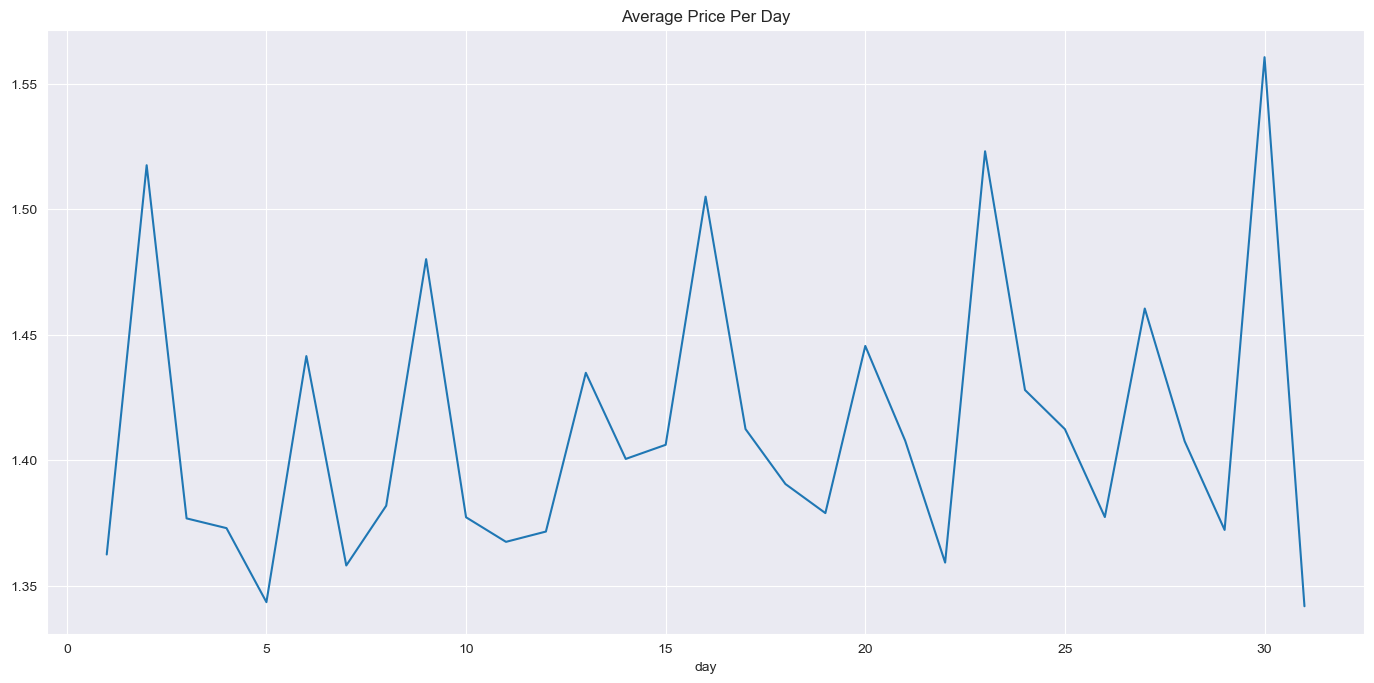

In [55]:
byDay = df1.groupby("day").mean()
plt.figure(figsize=(17,8),dpi=100)
byDay['averageprice'].plot()
plt.title('Average Price Per Day')

#### the average price is continuously flactuating throughout the month

Text(0.5, 1.0, 'Average Price According to Region')

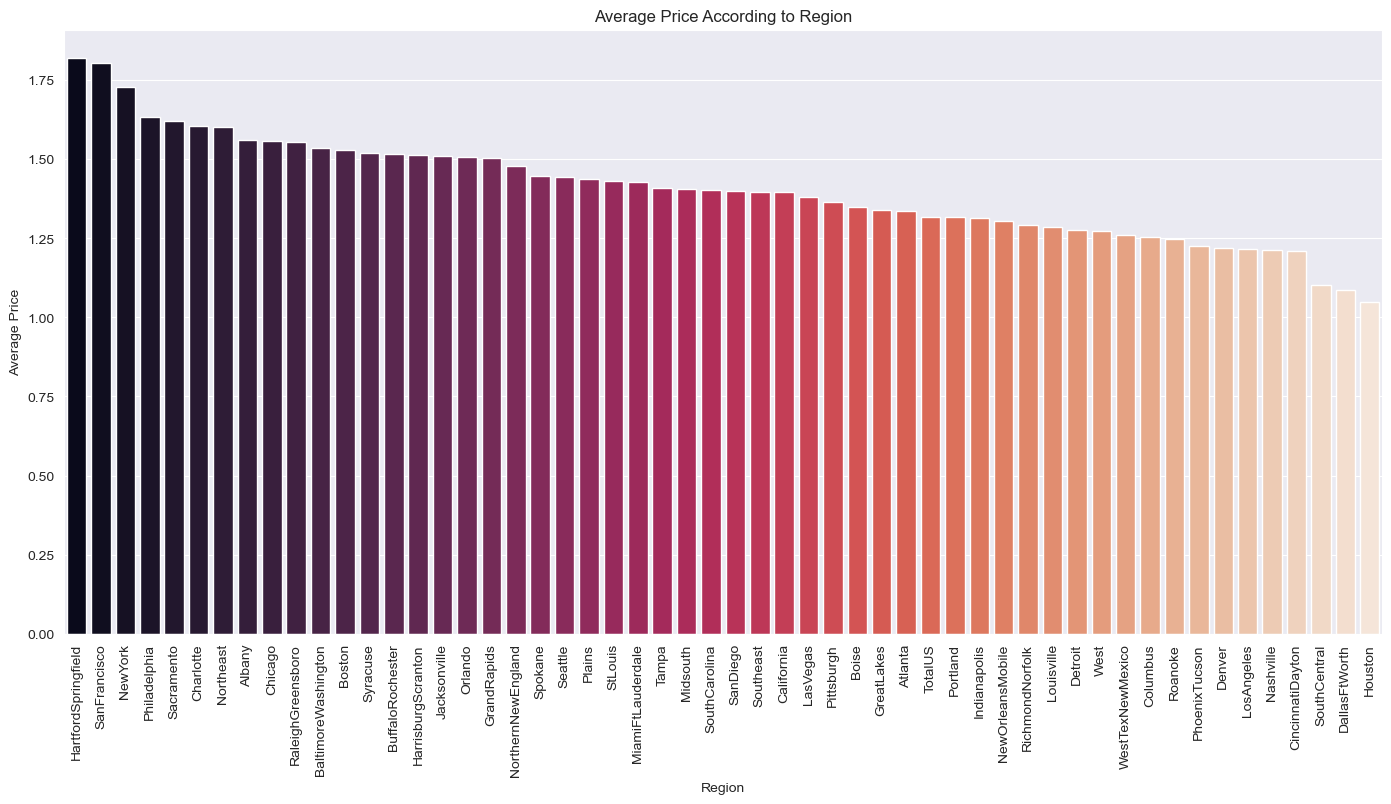

In [56]:
import seaborn as sns

byRegion=df1.groupby('region').mean()
byRegion.sort_values(by=['averageprice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["averageprice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

#### Hartford Springfield, SanFrancisco, NewYork are the regions with the highest avocado prices.

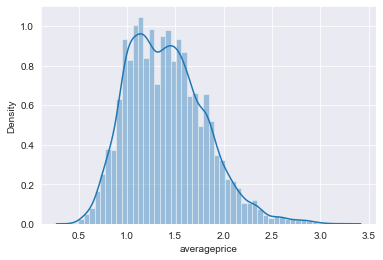

In [57]:
# Plotting the distplot for average price
sns.distplot(df1['averageprice']);

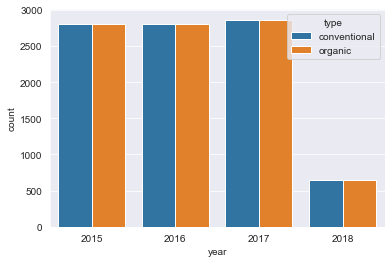

In [58]:
sns.countplot(x= 'year',data=df1,hue='type');

In [59]:
df1.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

#### There are 2 types - organic and conventional avacado.They are almost equal numbers of conventional and organic avacados.Though, there is very less observations in the year 2018.

In [60]:
df1.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

### all places has equal no of data except westtexnewmexico

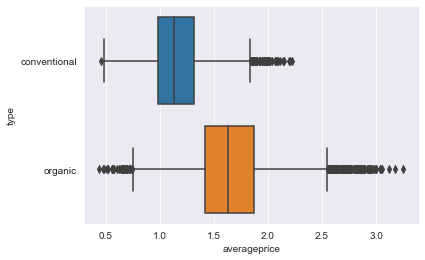

In [61]:
sns.boxplot(y="type", x="averageprice", data=df1);

#### organic are more expensive

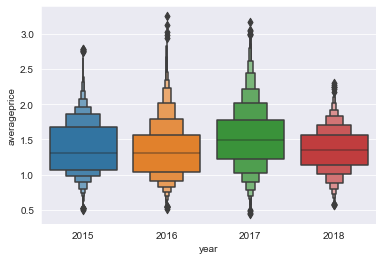

In [62]:
df1.year=df1.year.apply(str)
sns.boxenplot(x="year", y="averageprice", data=df1);

#### 2017 avacados are more expensive

<AxesSubplot:>

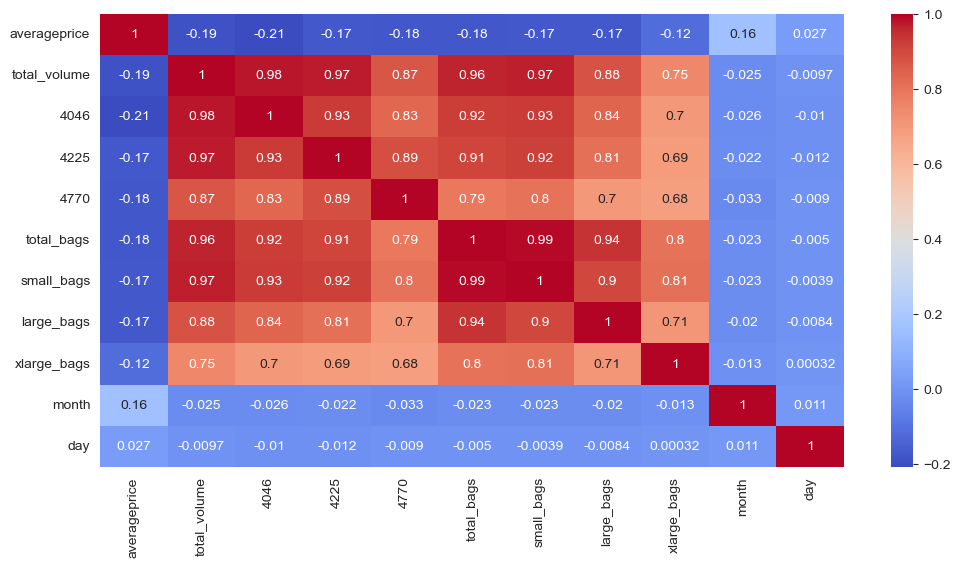

In [63]:
import numpy as np

corr_df = df1.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

### all features are more corelated each other than to target

In [79]:
df2=df1.copy()

In [81]:
dataset_vif = df2.copy()
dataset_vif.drop(columns=['date','type','region'],inplace = True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Xf = add_constant(dataset_vif)
pd.Series([variance_inflation_factor(Xf.values.astype(np.float64), i) 
               for i in range(Xf.shape[1])], 
              index=Xf.columns)

const           5.068485e+06
averageprice    1.099766e+00
total_volume    4.918067e+09
4046            6.598339e+08
4225            5.978631e+08
4770            4.762133e+06
total_bags      2.370316e+14
small_bags      1.364727e+14
large_bags      1.448103e+13
xlarge_bags     7.622174e+10
year            1.101665e+00
month           1.071816e+00
day             1.001467e+00
dtype: float64

Text(0.5, 1.0, 'Monthwise Distribution of Sales')

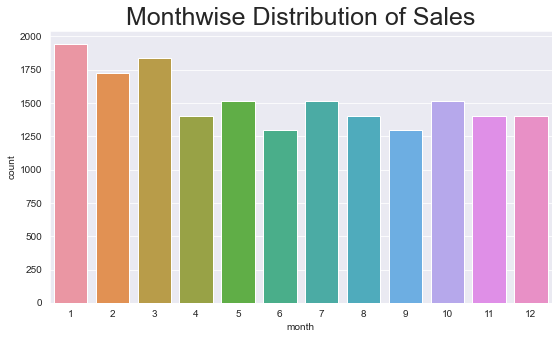

In [82]:
plt.figure(figsize=(9,5))
sns.countplot(df1['month'])
plt.title('Monthwise Distribution of Sales',fontdict={'fontsize':25})

<AxesSubplot:>

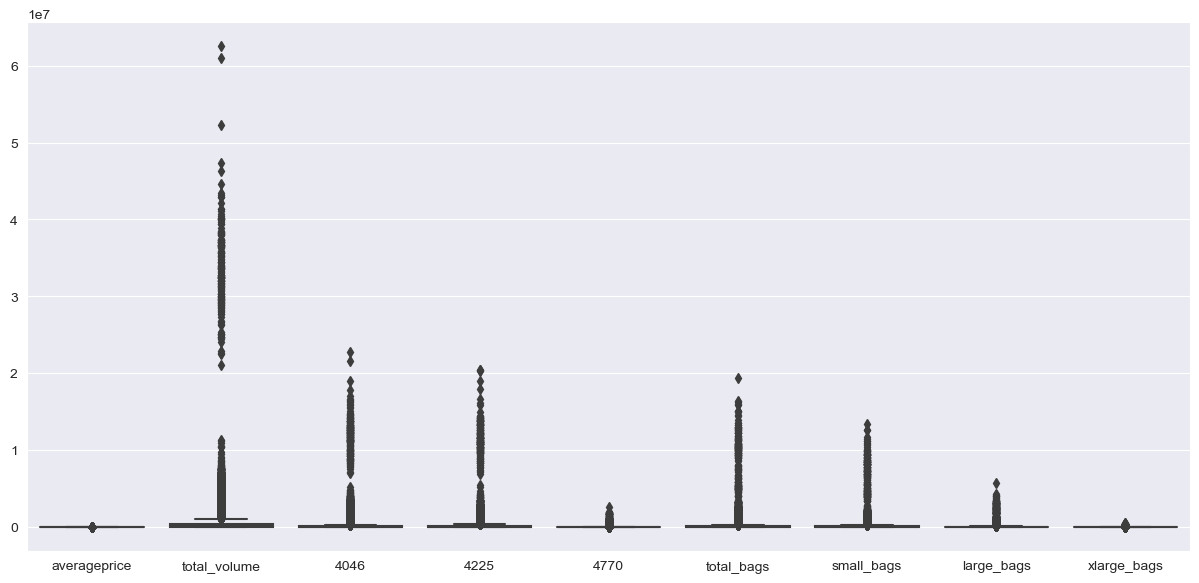

In [83]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = df2[[
 'averageprice',
 'total_volume',
 '4046',
 '4225',
 '4770',
 'total_bags',
 'small_bags',
 'large_bags',
 'xlarge_bags']])

In [84]:
df2.drop(columns=["date"],inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   averageprice  18249 non-null  float64
 1   total_volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   total_bags    18249 non-null  float64
 6   small_bags    18249 non-null  float64
 7   large_bags    18249 non-null  float64
 8   xlarge_bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  object 
 11  region        18249 non-null  object 
 12  month         18249 non-null  int64  
 13  day           18249 non-null  int64  
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [85]:
import numpy as np
from numpy import percentile

columns = df2.columns
for j in columns:
    if isinstance(df2[j][0], str) :
        continue
    else:
        #defining quartiles
        quartiles = percentile(df2[j], [25,75])
        # calculate min/max
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        df2[j] = df2[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

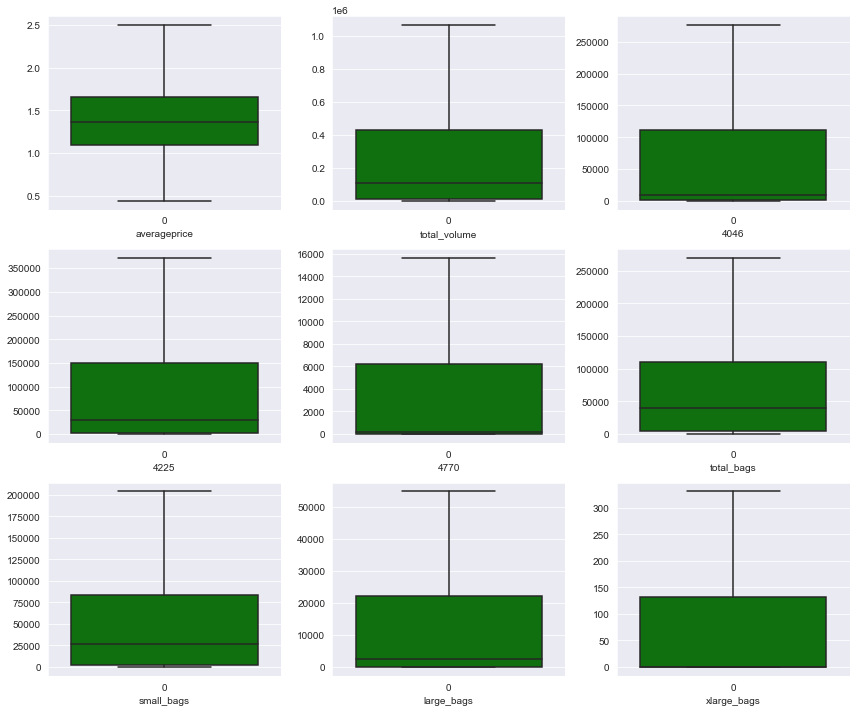

In [86]:
collist=df2[['averageprice','total_volume','4046','4225','4770','total_bags','small_bags','large_bags','xlarge_bags']].columns.values

plt.figure(figsize=(12,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df2[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

#### we can clearly see, all the outliers are removed

In [87]:
df3 = df2.copy()

In [88]:
df3.head()

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


## changing categorical data into numerical data by OneHotEncoder technique

In [89]:
df3['region'] = pd.Categorical(df3['region'])
dfDummies_region = pd.get_dummies(df3['region'], prefix = 'region')
dfDummies_region

,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [90]:
df3 = pd.concat([df3, dfDummies_region], axis=1)
df3.drop(columns="region",inplace=True)
df3

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,0,0,0,0,0,0,0,0,0,1


In [91]:
df3['month'] = pd.Categorical(df3['month'])
dfDummies_month = pd.get_dummies(df3['month'], prefix = 'month')
dfDummies_month

,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,1,0,0,0,0,0,0,0,0,0,0
18245,1,0,0,0,0,0,0,0,0,0,0,0
18246,1,0,0,0,0,0,0,0,0,0,0,0
18247,1,0,0,0,0,0,0,0,0,0,0,0


In [92]:
df3 = pd.concat([df3, dfDummies_month], axis=1)
df3.drop(columns="month",inplace=True)
df3

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,...,0,0,0,0,0,0,0,0,0,0


In [93]:
### applying label encoder into the type column
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
df3['type']= label_encoder.fit_transform(df3['type']) 
df3

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,...,0,0,0,0,0,0,0,0,0,0
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,...,0,0,0,0,0,0,0,0,0,0


#### Checking Correlation & Multicollinearity...

In [94]:
df4=df3.copy()


In [95]:
df4.head()

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,...,0,0,0,0,0,0,0,0,0,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,...,0,0,0,0,0,0,0,0,1,0


##  Preparing data for ML model

In [96]:
X=df4.iloc[:,1:78]
y=df4['averageprice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)
y_test = np.array(y_test,dtype = float)

### normalizing the data

In [97]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [98]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-X_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [103]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=X_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [104]:
#importing ML models from scikit-learn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# 1 linear regression

Explained_variance:  0.6606
R2:  0.6605
Adjusted_r2:  0.6547
MAE:  0.1784
MSE:  0.054
RMSE:  0.2325
Accuracy: 64.17 %
Standard Deviation: 1.19 %


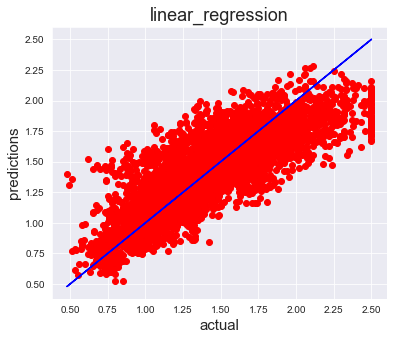

In [105]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

regressor=LinearRegression()
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('linear_regression', fontsize = 18)
plt.show()

## 2. Random Forest Regression Model

Explained_variance:  0.8983
R2:  0.8982
Adjusted_r2:  0.8965
MAE:  0.0918
MSE:  0.0162
RMSE:  0.1273
Accuracy: 87.53 %
Standard Deviation: 0.52 %


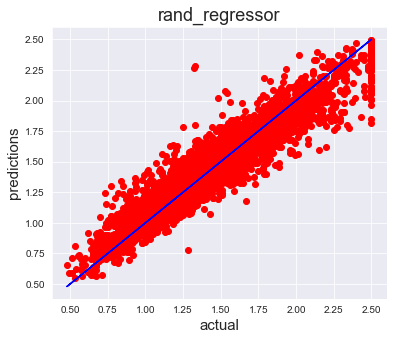

In [106]:
from sklearn.ensemble import RandomForestRegressor

rand_regressor = RandomForestRegressor()
rand_regressor.fit(X_train, y_train)
y_pred_rf = rand_regressor.predict(X_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_rf, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('rand_regressor', fontsize = 18)
plt.show()

## 3. Decision Tree Regression Model

Explained_variance:  0.8302
R2:  0.8301
Adjusted_r2:  0.8272
MAE:  0.1103
MSE:  0.027
RMSE:  0.1645
Accuracy: 79.18 %
Standard Deviation: 1.55 %


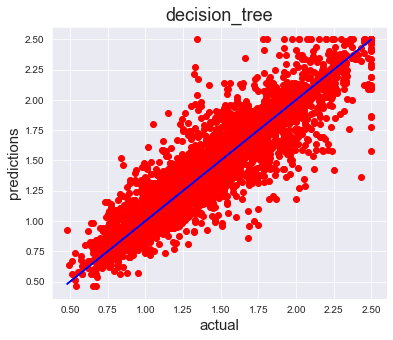

In [107]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_dt, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('decision_tree', fontsize = 18)
plt.show()


## 4.SVR model

Explained_variance:  0.8222
R2:  0.8221
Adjusted_r2:  0.8191
MAE:  0.1222
MSE:  0.0283
RMSE:  0.1683
Accuracy: 79.54 %
Standard Deviation: 1.05 %


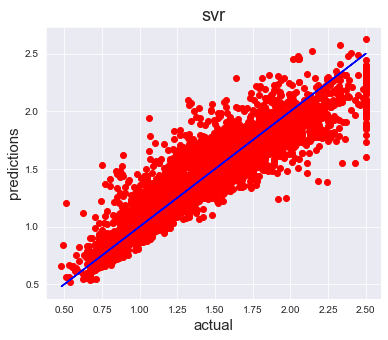

In [108]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

regression_results(y_test,y_pred_svr)
model_accuracy(svr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_svr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('svr', fontsize = 18)
plt.show()

## 5.KNeighborsRegressor model

Explained_variance:  0.7707
R2:  0.7707
Adjusted_r2:  0.7668
MAE:  0.1368
MSE:  0.0365
RMSE:  0.1911
Accuracy: 69.00 %
Standard Deviation: 1.79 %


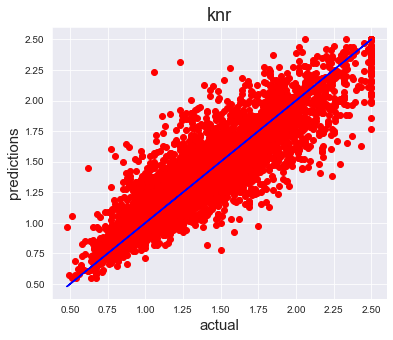

In [109]:
from sklearn.neighbors import KNeighborsRegressor

knr=KNeighborsRegressor(n_neighbors=2)
knr.fit(X_train, y_train)
y_pred_knr = knr.predict(X_test)

regression_results(y_test,y_pred_knr)
model_accuracy(knr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_knr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('knr', fontsize = 18)
plt.show()

## 6.XGBRegressor model

Explained_variance:  0.9057
R2:  0.9057
Adjusted_r2:  0.9041
MAE:  0.0913
MSE:  0.015
RMSE:  0.1225
Accuracy: 89.04 %
Standard Deviation: 0.21 %


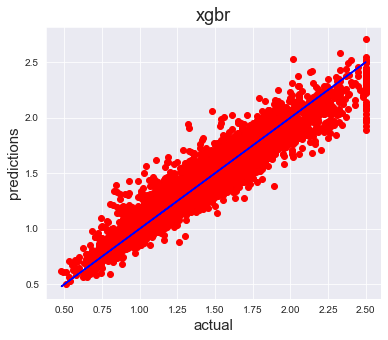

In [110]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(random_state=10)
xgbr.fit(X_train, y_train)
y_pred_xgbr = xgbr.predict(X_test)

regression_results(y_test,y_pred_xgbr)
model_accuracy(xgbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_xgbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('xgbr', fontsize = 18)
plt.show()

### out of all models XGBRegressor model has highest accuracy so we will tune this model for further improvement of this model

## Hyperparameter tuning using GridSearchCV

In [119]:
parameters =  {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [120]:
grd = GridSearchCV(xgbr, param_grid = parameters, cv =5, verbose=True, n_jobs=-1)

In [121]:
best_clf = grd.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[02:12:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[02:12:36] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [122]:
best_clf.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.07, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=7, max_leaves=0, min_child_weight=4,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             nthread=4, num_parallel_tree=1, objective='reg:linear',
             predictor='auto', random_state=10, ...)

In [123]:
best_clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.07,
 'max_depth': 7,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

Explained_variance:  0.8302
R2:  0.8301
Adjusted_r2:  0.8272
MAE:  0.1103
MSE:  0.027
RMSE:  0.1645
Accuracy: 91.24 %
Standard Deviation: 0.18 %


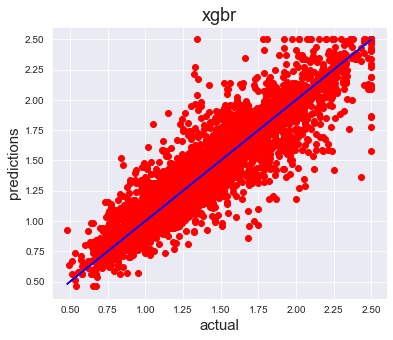

In [125]:
xgbr=XGBRegressor(colsample_bytree=0.7,learning_rate=0.07,max_depth= 7,min_child_weight= 4,n_estimators=500,nthread=4,subsample=0.7)
xgbr.fit(X_train, y_train)
y_pred_xgbr = decision_tree.predict(X_test)

regression_results(y_test,y_pred_xgbr)
model_accuracy(xgbr)

plt.figure(figsize = (6,5))
plt.scatter(x = y_test, y=y_pred_xgbr, color = 'r')
plt.plot(y_test,y_test, color = 'b')
plt.xlabel('actual', fontsize = 15)
plt.ylabel('predictions', fontsize = 15)
plt.title('xgbr', fontsize = 18)
plt.show()

## acuracy has increased after the tunning

In [126]:
filename='Avacado.pkl'
pickle.dump(xgbr,open(filename,'wb'))

In [127]:
log =pickle.load(open('Avacado.pkl','rb'))
score=log.score(X_test, y_test)
print(score*100)

92.57440759156592


# part-2

In [134]:
df0

,date,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [135]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          18249 non-null  datetime64[ns]
 1   averageprice  18249 non-null  float64       
 2   total_volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   total_bags    18249 non-null  float64       
 7   small_bags    18249 non-null  float64       
 8   large_bags    18249 non-null  float64       
 9   xlarge_bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  month         18249 non-null  int64         
 14  day           18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

In [137]:
df0.drop('date', axis=1, inplace=True)

In [138]:
df11=df0.copy()

In [139]:
#total missing values
df11.isnull().sum()

averageprice    0
total_volume    0
4046            0
4225            0
4770            0
total_bags      0
small_bags      0
large_bags      0
xlarge_bags     0
type            0
year            0
region          0
month           0
day             0
dtype: int64

In [140]:
# % of missing values
df11.isnull().sum()*100/df0.shape[0]

averageprice    0.0
total_volume    0.0
4046            0.0
4225            0.0
4770            0.0
total_bags      0.0
small_bags      0.0
large_bags      0.0
xlarge_bags     0.0
type            0.0
year            0.0
region          0.0
month           0.0
day             0.0
dtype: float64

In [141]:
#counting total vaues of 0/zero entries in data...
df11[df11 ==0].count()

averageprice        0
total_volume        0
4046              242
4225               61
4770             5497
total_bags         15
small_bags        159
large_bags       2370
xlarge_bags     12048
type                0
year                0
region              0
month               0
day                 0
dtype: int64

Text(0.5, 1.0, 'Average Price According to Region')

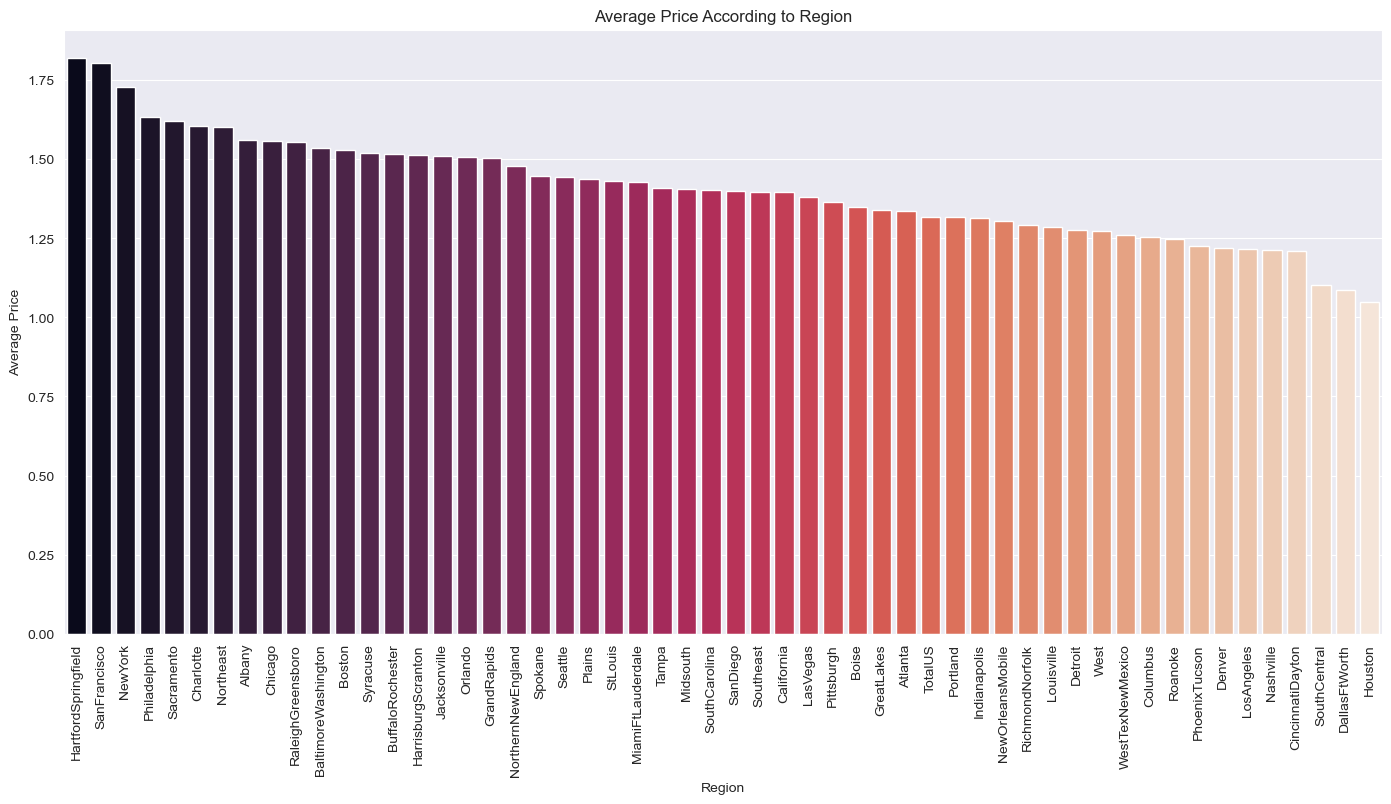

In [142]:
import seaborn as sns

byRegion=df11.groupby('region').mean()
byRegion.sort_values(by=['averageprice'], ascending=False, inplace=True)
plt.figure(figsize=(17,8),dpi=100)
sns.barplot(x = byRegion.index,y=byRegion["averageprice"],data = byRegion,palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price According to Region')

### Hartford Springfield, SanFrancisco, NewYork are the regions with the highest avocado prices.

<AxesSubplot:xlabel='type', ylabel='count'>

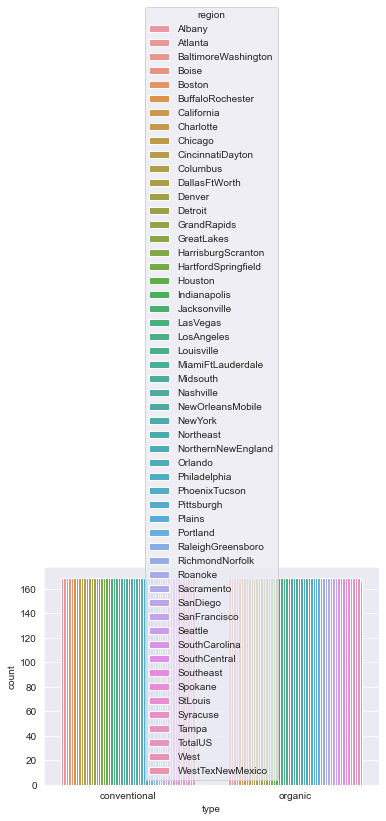

In [149]:
sns.countplot(x= 'type',data=df11,hue='region')

In [150]:
df11.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

### all places has equal no of data except westtexnewmexico

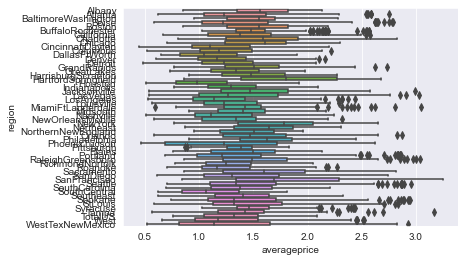

In [154]:
sns.boxplot(y="region", x="averageprice", data=df11);

<AxesSubplot:>

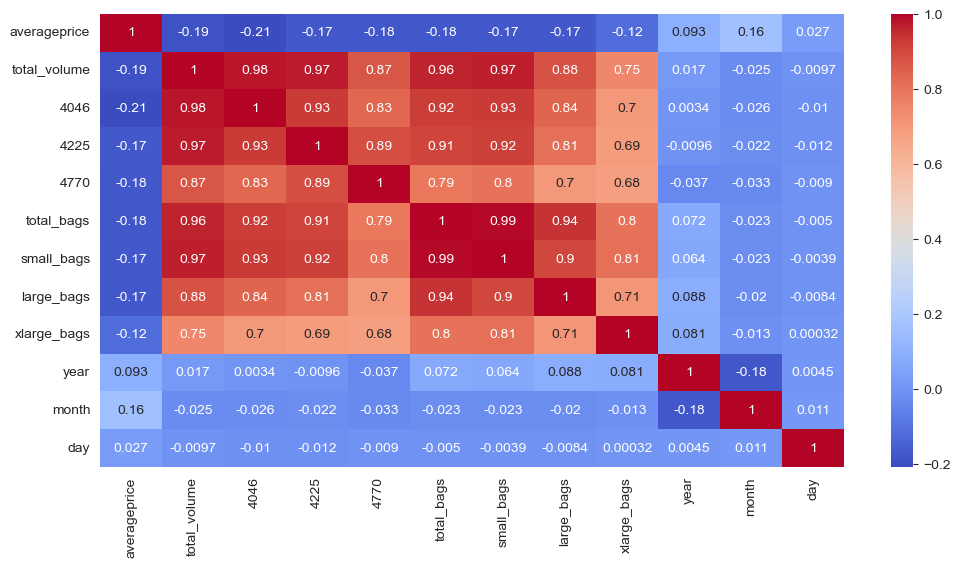

In [155]:
import numpy as np

corr_df = df11.corr(method='pearson')
plt.figure(figsize=(12,6),dpi=100)
sns.heatmap(corr_df,cmap='coolwarm',annot=True)

Text(0.5, 1.0, 'regionwise Distribution of Sales')

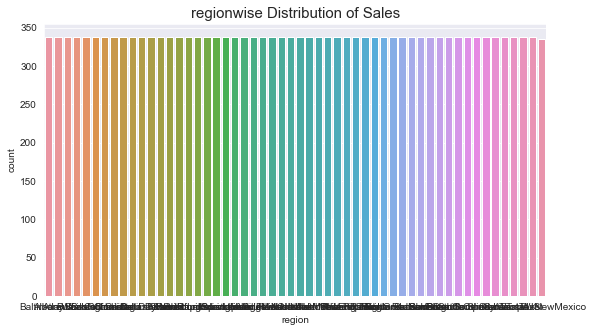

In [158]:
plt.figure(figsize=(9,5))
sns.countplot(df11['region'])
plt.title('regionwise Distribution of Sales',fontdict={'fontsize':15})

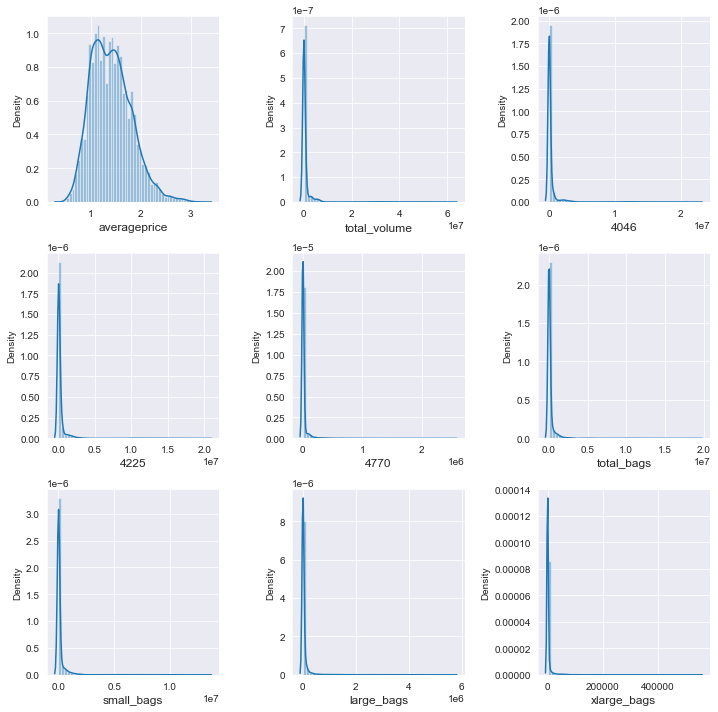

In [160]:
#distribution of numerical features.. 
i=0
plt.figure(figsize=(10,10))
for column in df11[['averageprice','total_volume','4046','4225','4770','total_bags','small_bags','large_bags','xlarge_bags']].columns:
    plt.subplot(3,3,i+1)
    sns.distplot(df11[column])
    plt.xlabel(column,fontsize=12)
    i+=1
    
plt.tight_layout()

In [156]:
df12=df11.copy()

<AxesSubplot:>

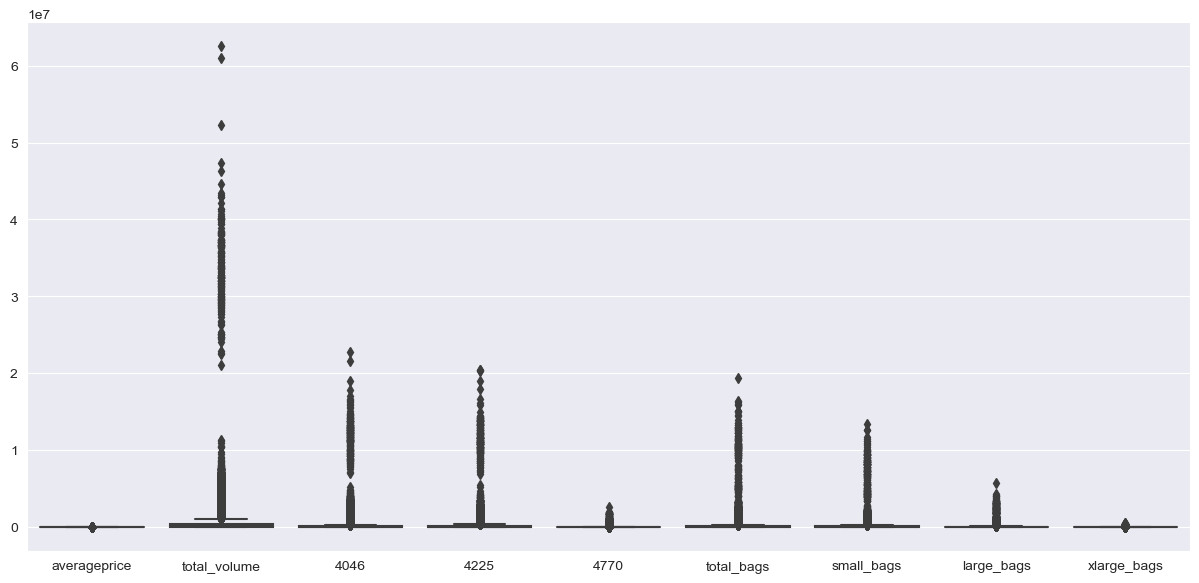

In [161]:
plt.figure(figsize=(15,7),dpi=100)
sns.boxplot(data = df12[[
 'averageprice',
 'total_volume',
 '4046',
 '4225',
 '4770',
 'total_bags',
 'small_bags',
 'large_bags',
 'xlarge_bags']])

In [162]:
import numpy as np
from numpy import percentile

columns = df12.columns
for j in columns:
    if isinstance(df12[j][0], str) :
        continue
    else:
        #defining quartiles
        quartiles = percentile(df12[j], [25,75])
        # calculate min/max
        lower_fence = quartiles[0] - (1.5*(quartiles[1]-quartiles[0]))
        upper_fence = quartiles[1] + (1.5*(quartiles[1]-quartiles[0]))
        df12[j] = df12[j].apply(lambda x: upper_fence if x > upper_fence else (lower_fence if x < lower_fence else x))

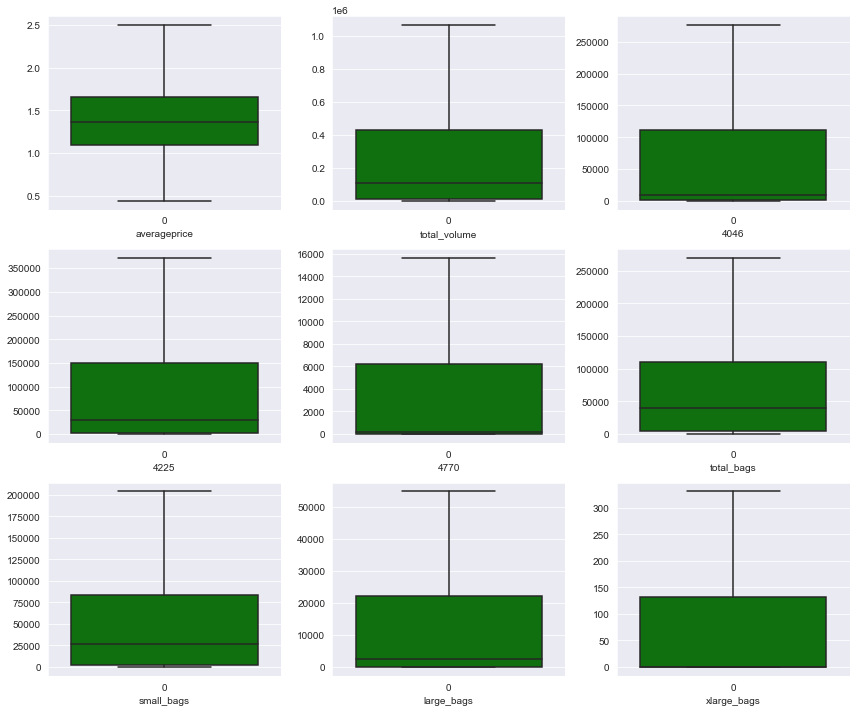

In [164]:
collist=df12[['averageprice','total_volume','4046','4225','4770','total_bags','small_bags','large_bags','xlarge_bags']].columns.values

plt.figure(figsize=(12,10))
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=df12[collist[i]],color='green',orient='v').set(xlabel=collist[i])
    plt.tight_layout()

In [165]:
dataset_vif = df12.copy()
dataset_vif.drop(columns=['type','region'],inplace = True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Xf = add_constant(dataset_vif)
pd.Series([variance_inflation_factor(Xf.values.astype(np.float64), i) 
               for i in range(Xf.shape[1])], 
              index=Xf.columns)

const           5.767580e+06
averageprice    1.575172e+00
total_volume    3.913739e+01
4046            6.761419e+00
4225            1.192476e+01
4770            2.590183e+00
total_bags      3.996148e+01
small_bags      2.487218e+01
large_bags      4.648036e+00
xlarge_bags     1.823411e+00
year            1.254110e+00
month           1.092939e+00
day             1.001774e+00
dtype: float64

In [170]:
df13 = df12.copy()

## changing categorical data into numerical data by OneHotEncoder technique

In [172]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
 
label_encoder = preprocessing.LabelEncoder() 
df13['region']= label_encoder.fit_transform(df13['region']) 
df13

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53,1,14


In [203]:
df14=df13.copy()

In [204]:
label_encoder = preprocessing.LabelEncoder() 
df14['type']= label_encoder.fit_transform(df14['type']) 
df14

,averageprice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


In [205]:
df15=df14.copy()

In [206]:
X=df15.drop('region',axis=1)
X

y=df15['region']
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [207]:
#data scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [208]:
#Splitting data for train and Test 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=50)

In [209]:
#shape of the data
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(18249, 13)
(13686, 13)
(4563, 13)


In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

## 1 LogisticRegression Model

In [213]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model1= LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
print(classification_report(y_test, y_pred1))


              precision    recall  f1-score   support

           0       0.33      0.40      0.36        80
           1       0.35      0.24      0.29        91
           2       0.55      0.54      0.54        69
           3       0.20      0.44      0.28        87
           4       0.74      0.43      0.54        79
           5       0.25      0.33      0.28        78
           6       0.71      0.55      0.62        91
           7       0.42      0.48      0.45        83
           8       0.71      0.79      0.74        89
           9       0.53      0.60      0.56        80
          10       0.38      0.26      0.31        77
          11       0.57      0.41      0.47        96
          12       0.49      0.47      0.48        90
          13       0.59      0.43      0.50        84
          14       0.45      0.41      0.43        82
          15       0.55      0.24      0.34        90
          16       0.73      0.44      0.55        93
          17       0.32    

In [214]:
cross_val_score(model1,X,y,cv=10).mean()

0.3658720259552992

## 2 DecisionTreeClassifier Model

In [215]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78        80
           1       0.71      0.65      0.68        91
           2       0.91      0.86      0.88        69
           3       0.82      0.69      0.75        87
           4       0.88      0.86      0.87        79
           5       0.71      0.68      0.69        78
           6       0.77      0.69      0.73        91
           7       0.90      0.87      0.88        83
           8       0.89      0.92      0.91        89
           9       0.71      0.75      0.73        80
          10       0.70      0.74      0.72        77
          11       0.87      0.88      0.87        96
          12       0.86      0.86      0.86        90
          13       0.73      0.75      0.74        84
          14       0.78      0.79      0.79        82
          15       0.60      0.62      0.61        90
          16       0.90      0.88      0.89        93
          17       0.76    

In [216]:
cross_val_score(model2,X,y,cv=7).mean()

0.5521946408022357

## 3 RandomForestClassifier

In [217]:
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90        80
           1       0.93      0.82      0.87        91
           2       0.96      0.96      0.96        69
           3       0.86      0.79      0.83        87
           4       0.95      0.99      0.97        79
           5       0.93      0.81      0.86        78
           6       0.75      0.67      0.71        91
           7       0.90      0.89      0.90        83
           8       0.95      0.99      0.97        89
           9       0.86      0.86      0.86        80
          10       0.85      0.83      0.84        77
          11       0.96      0.96      0.96        96
          12       0.97      0.92      0.94        90
          13       0.84      0.92      0.88        84
          14       0.87      0.91      0.89        82
          15       0.61      0.59      0.60        90
          16       0.96      0.95      0.95        93
          17       0.96    

In [218]:
cross_val_score(model3,X,y,cv=5).mean()

0.6371224242333234

## 4 GradientBoostingClassifier model

In [219]:
from sklearn.ensemble import GradientBoostingClassifier
model4 = GradientBoostingClassifier(random_state=1)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        80
           1       0.79      0.67      0.73        91
           2       0.92      0.94      0.93        69
           3       0.84      0.71      0.77        87
           4       0.86      0.86      0.86        79
           5       0.78      0.76      0.77        78
           6       0.85      0.69      0.76        91
           7       0.86      0.87      0.86        83
           8       0.98      0.98      0.98        89
           9       0.79      0.76      0.78        80
          10       0.70      0.74      0.72        77
          11       0.90      0.89      0.89        96
          12       0.95      0.83      0.89        90
          13       0.80      0.79      0.79        84
          14       0.81      0.83      0.82        82
          15       0.68      0.60      0.64        90
          16       0.98      0.96      0.97        93
          17       0.86    

In [221]:
cross_val_score(model4,X,y,cv=5).mean()

0.5732820175916089

## 5 AdaBoostClassifier model

In [223]:
from sklearn.ensemble import AdaBoostClassifier
model5 = AdaBoostClassifier(random_state=40)
model5.fit(X_train, y_train)
y_pred5 = model5.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        80
           1       0.10      0.43      0.17        91
           2       0.10      0.49      0.17        69
           3       0.00      0.00      0.00        87
           4       0.00      0.00      0.00        79
           5       0.00      0.00      0.00        78
           6       0.00      0.00      0.00        91
           7       0.00      0.00      0.00        83
           8       0.00      0.00      0.00        89
           9       0.00      0.00      0.00        80
          10       0.03      1.00      0.06        77
          11       0.00      0.00      0.00        96
          12       0.00      0.02      0.01        90
          13       0.00      0.00      0.00        84
          14       0.00      0.00      0.00        82
          15       0.00      0.00      0.00        90
          16       0.00      0.00      0.00        93
          17       0.20    

In [224]:
cross_val_score(model5,X,y,cv=5).mean()

0.06109929911366221

## Hyperparameter tuning using GridSearchCV

In [228]:
param_grid={'bootstrap': [True], 
            'max_depth': [5, 10, None], 
            'max_features': ['auto', 'log2'], 
            'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]
           }

In [229]:
grid_search=GridSearchCV(estimator=model3, param_grid=param_grid,n_jobs=-1)

In [230]:
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]})

In [231]:
best_param =grid_search.best_params_
print(best_param)

{'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'n_estimators': 15}


In [232]:
grid_search.best_score_

0.8331139728734254

In [234]:
grid_search=RandomForestClassifier(bootstrap=True,max_depth=None,max_features='auto',n_estimators=15)
grid_search.fit(X_train,y_train)

RandomForestClassifier(max_features='auto', n_estimators=15)

In [235]:
y_pred1=grid_search.predict(X_test)

In [236]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86        80
           1       0.86      0.79      0.82        91
           2       0.92      0.97      0.94        69
           3       0.82      0.79      0.81        87
           4       0.93      0.96      0.94        79
           5       0.83      0.79      0.81        78
           6       0.78      0.69      0.73        91
           7       0.88      0.92      0.90        83
           8       0.90      0.99      0.94        89
           9       0.76      0.81      0.79        80
          10       0.76      0.74      0.75        77
          11       0.94      0.92      0.93        96
          12       0.96      0.87      0.91        90
          13       0.80      0.85      0.82        84
          14       0.85      0.89      0.87        82
          15       0.58      0.62      0.60        90
          16       0.97      0.96      0.96        93
          17       0.94    

In [237]:
filename='Avacado1.pkl'
pickle.dump(xgbr,open(filename,'wb'))